# Plot 3D power and forecasted errorbars

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import forecast as fc
import decimal

Populating the interactive namespace from numpy and matplotlib


In [2]:
forecast = fc.FisherForecast()

In [3]:
# define binning for plots
kmin_hMpc=0.01
kmax_hMpc=1.0
ks_hMpc=np.linspace(kmin_hMpc,kmax_hMpc,100)
Nk=len(ks_hMpc)
dk_hMpc=ks_hMpc[1]-ks_hMpc[0]
print('Nk =',Nk)
print('dk =',dk_hMpc)

Nk = 100
dk = 0.01


In [4]:
def z_str(z):
    return "{:.3g}".format(decimal.Decimal(z))

In [5]:
forecast.verbose=1
forecast.lmin=3701.0
forecast.lmax=3901.0
P1=forecast.TotalFluxP3D_degkms(10.0,0.001)
print('P_T',P1)
np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
P2=forecast.TotalFluxP3D_degkms(10.0,0.001,Pw2D=Pw2D,PN_eff=PN_eff)
print('P_T',P2)

lc, lrc, zq = 3799.68432899 1087.19823399 2.49493239612
I1, I2, I3 = 0.00030430364383 0.000234710716583 3.79130900942e-05
np_eff, Pw2D, PN_eff = 0.360241173833 0.0428215529468 0.345850717531
P_T 1.35567674625
lc, lrc, zq = 3799.68432899 1087.19823399 2.49493239612
I1, I2, I3 = 0.00030430364383 0.000234710716583 3.79130900942e-05
np_eff, Pw2D, PN_eff = 0.360241173833 0.0428215529468 0.345850717531
P_T 1.35567674625


### Plot fixed mu (0.8<mu<1.0), for different z

3501.0 <l< 3701.0
lc, lrc, zq = 3599.61122901 1087.19823399 2.31090606704
I1, I2, I3 = 9.71606329198e-05 4.36786587669e-05 1.69638064401e-05
np_eff, Pw2D, PN_eff = 0.115020839096 0.0781686160583 1.51794641816
3701.0 <l< 3901.0
lc, lrc, zq = 3799.68432899 1087.19823399 2.49493239612
I1, I2, I3 = 0.00030430364383 0.000234710716583 3.79130900942e-05
np_eff, Pw2D, PN_eff = 0.360241173833 0.0428215529468 0.345850717531
3901.0 <l< 4101.0
lc, lrc, zq = 3999.75011719 1087.19823399 2.67895199986
I1, I2, I3 = 0.00026100778473 0.000197842586227 4.02151764261e-05
np_eff, Pw2D, PN_eff = 0.308986608137 0.0490632890498 0.498651191033
4101.0 <l< 4301.0
lc, lrc, zq = 4199.80963854 1087.19823399 2.86296583937
I1, I2, I3 = 0.000254862037893 0.000208644041842 3.57057622351e-05
np_eff, Pw2D, PN_eff = 0.301711141347 0.0542674586178 0.464346107708
4301.0 <l< 4501.0
lc, lrc, zq = 4399.86374789 1087.19823399 3.04697470095
I1, I2, I3 = 0.000211538819354 0.000172653072772 3.41850044288e-05
np_eff, Pw2D, PN_eff =

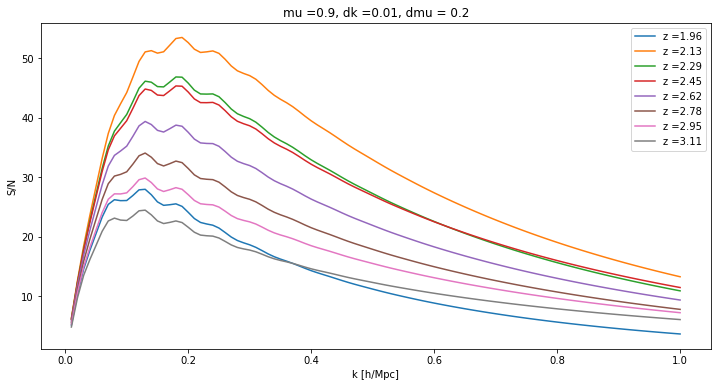

In [6]:
forecast.verbose=1
lmin=3501.0
lmax=3701.0
plt.figure(figsize=(12,6))
while lmin < 5000:
    print(lmin,'<l<',lmax)    
    forecast.lmin=lmin
    forecast.lmax=lmax
    z = forecast.mean_z()
    mu = 0.9
    dmu = 0.2
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu,Pw2D=Pw2D,PN_eff=PN_eff) for k in ks_hMpc])      
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='z ='+z_str(z))
    lmin = lmax 
    lmax += 200
plt.legend(loc='best')
plt.title('mu ='+str(mu)+', dk ='+str(dk_hMpc)+', dmu = '+str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_mu'+str(mu)+'.pdf')

### Plot fixed z, for different mu


mus [ 0.1  0.3  0.5  0.7  0.9]
lc, lrc, zq = 3798.68398264 1087.19823399 2.49401228209
I1, I2, I3 = 0.000298075941943 0.000227307458605 3.81976205495e-05
np_eff, Pw2D, PN_eff = 0.3528686869 0.0432218782516 0.363158541964


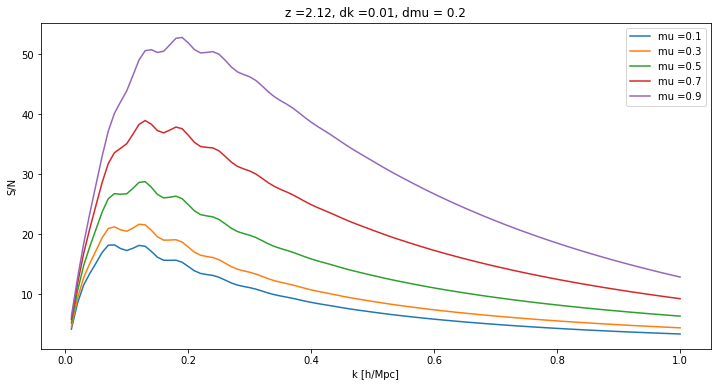

In [7]:
mus=np.linspace(0.1,0.9,5)
dmu=mus[1]-mus[0]
print('mus',mus)
forecast.lmin=3700.0
forecast.lmax=3900.0
z = forecast.mean_z()
np_eff,Pw2D,PN_eff=forecast.EffectiveDensityAndNoise()
plt.figure(figsize=(12,6))
for mu in mus:
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu,Pw2D=Pw2D,PN_eff=PN_eff) for k in ks_hMpc])    
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='mu ='+str(mu))
plt.legend(loc='best')
plt.title('z ='+z_str(z)+', dk ='+str(dk_hMpc)+', dmu = '+str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_z'+z_str(z)+'.pdf')